# Clusterização de clientes de instituição financeira
Neste projeto, eu construirei um modelo de machine learning para agrupar clientes de uma instituição financeira baseado nos seus perfis de gastos, de forma que eles possam ter mais controle e gestão sobre suas finanças através de um novo produto que está sendo desenvolvido. Esta é uma tarefa de aprendizado não supervisionado, em que temos um conjunto de dados sem rótulos para clusterização.

Utilizarei o seguinte pipeline de solução, baseado no framework CRISP-DM:
1. Definir o problema de negócio.
2. Coletar os dados e obter uma visão geral deles.
3. Explorar os dados (EDA) e realizar feature engineering.
4. Limpar e pré-processar dos dados.
5. Agrupar clientes em clusters utilizando algoritmos de machine learning.
6. Interpretar os resultados, analisando os grupos criados e obtendo personas. Então, fornecer insights de negócio para auxiliar a tomada de decisão pela empresa.

Neste notebook, realizarei os passos 1, 2 e 3. Entre os objetivos da minha análise aqui, estão:
1. Analisar profundamente os dados, de forma a entender as características e padrões de gastos dos clientes, fornecendo insights de negócio.
2. Criar novas features de modo a favorecer a modelagem e entendimento do problema, extraindo o máximo de informação possível das variáveis disponíveis.
3. Guiar a etapa de pré-processamento e modelagem, uma vez que as técnicas de transformação dos dados e a escolha de algoritmos dependem das informações que temos.

Finalmente, cada passo será abordado em detalhes abaixo, explicando o que será feito e o motivo por trás das decisões tomadas.

# 1. Problema de negócio
Uma empresa do setor financeiro deseja agrupar clientes baseado nos seus perfis de gastos, de forma que eles possam ter mais controle e gestão sobre suas finanças através de um produto que está sendo desenvolvido.

Agrupar os clientes de acordo com o perfil de gastos pode ser extremamente benéfico para uma empresa que desenvolve um produto de gerenciamento de gastos. Entre os motivos para isso, estão:

1. Personalização de Serviços: Agrupar clientes com base em seus perfis de gastos permite que a empresa personalize seus serviços e recomendações. Clientes com comportamentos de gastos semelhantes podem receber orientações específicas e ofertas personalizadas que atendam às suas necessidades individuais.

2. Segmentação de Mercado: A segmentação de clientes com base em seus padrões de gastos ajuda a empresa a identificar grupos de clientes com características e preferências semelhantes. Isso pode levar a estratégias de marketing mais eficazes, direcionadas a públicos-alvo específicos, aumentando as chances de conversão.

3. Melhoria na Experiência do Cliente: Ao entender melhor como diferentes grupos de clientes gastam seu dinheiro, a empresa pode ajustar a interface e as funcionalidades do produto para atender às necessidades de cada grupo. Isso melhora a experiência do cliente e a satisfação geral.

4. Aprimoramento do Desenvolvimento de Produtos: Ao analisar os dados dos diferentes grupos de clientes, a empresa pode obter insights valiosos para o desenvolvimento de novos recursos ou produtos. Isso ajuda a garantir que o produto evolua de acordo com as necessidades reais dos clientes.

### Importando as bibliotecas necessárias

In [13]:
# Manipulação e visualização de dados.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utilidades.
from notebooks.eda_utils import *

# Filtrar warnings.
import warnings
warnings.filterwarnings('ignore')

# Seaborn grid style.
sns.set_theme(style='whitegrid')

# 2. Entendimento geral dos dados
- Os dados são fictícios e contêm informações de pessoas, contas e transações. 
- A base de transações possui registros detalhados de transações bancárias e de cartão de crédito.
- As bases se relacionam por meio de identificadores. 

In [14]:
accounts = pd.read_csv('data/accounts.csv')
person = pd.read_csv('data/person.csv')
transactions = pd.read_csv('data/transactions.csv')

Antes de tudo, vamos dar uma olhada nos 3 datasets, de forma que possamos uni-los através da função "merge" do Pandas.

In [15]:
accounts.head()

,id,type,subtype,balance,currency_code,name,person_id,account_id,date
0,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16
1,978f92cf-8d5b-437a-a046-cdaa9105624c,CREDIT,CREDIT_CARD,6311.67,BRL,Cartão de Crédito,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,978f92cf-8d5b-437a-a046-cdaa9105624c,2023-09-15 15:50:21
2,dcd96f70-8b16-42b0-a944-afec5d8305ce,CREDIT,CREDIT_CARD,7482.25,BRL,Cartão de Crédito,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,dcd96f70-8b16-42b0-a944-afec5d8305ce,2023-09-09 03:38:49
3,6c2a44fe-2ba7-4626-aaff-f244a0647eae,BANK,SAVINGS_ACCOUNT,5740.29,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,6c2a44fe-2ba7-4626-aaff-f244a0647eae,2023-09-12 14:21:21
4,abb359a2-3802-48e7-976b-8671e1de0884,BANK,CHECKING_ACCOUNT,5136.49,BRL,Conta Corrente,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,abb359a2-3802-48e7-976b-8671e1de0884,2023-09-12 04:10:04


In [16]:
person.head()

,id,name,suitability
0,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,Ana Julia Santos,conservador
1,01018c18-ecb5-4cb6-b16f-bece97935974,Emilly Moura,moderado-agressivo
2,65d3336e-dafd-4663-8a53-97792c847074,Luiz Miguel Caldeira,conservador
3,6a33c027-13f2-4fbf-8bbb-74e6438d11c8,Sarah Souza,moderado-conservador
4,55252085-c5d6-4b7d-b221-fd3ad76ba8e5,Samuel Oliveira,moderado-agressivo


In [17]:
transactions.head()

,id,currency_code,amount,date,category,account_id
0,b7ebd81b-98f7-47ab-91f3-52bc80be57a6,BRL,-498.71,2023-07-20 03:57:57,Educação,1968bd13-dd25-4f88-bccc-5cff92d6811b
1,b8d83679-02ab-4241-b15d-11e9c0033864,BRL,-265.00,2023-07-23 05:17:06,Outras saídas,1968bd13-dd25-4f88-bccc-5cff92d6811b
2,99cab263-da5c-4706-9f2c-92cb779acaf7,BRL,-18.95,2023-06-26 05:54:25,Transporte,1968bd13-dd25-4f88-bccc-5cff92d6811b
3,5a78f1f0-f541-440f-9d3d-c8c21373ffc8,BRL,-262.70,2023-06-21 00:34:08,Outras saídas,1968bd13-dd25-4f88-bccc-5cff92d6811b
4,fc4e9552-bb41-4757-8c16-ff2c584ee01b,BRL,-179.44,2023-08-05 01:09:42,"Imposto, juros e multa",1968bd13-dd25-4f88-bccc-5cff92d6811b


Olhando as dimensõs dos três datasets.

In [18]:
accounts.shape, person.shape, transactions.shape

((7569, 9), (2531, 3), (400110, 6))

Considerando que a coluna id em person corresponde ao person_id em accounts, vou realizar a união desses dois. Então, uma vez que account_id é a chave comum entre accounts e transactions, unirei novamente, obtendo o dataset final.

In [19]:
merged_df = pd.merge(accounts, person, left_on='person_id', right_on='id', how='inner')

In [20]:
merged_df.shape

(7569, 12)

Observe que a dimensão de transactions foi preservada! Muito bom, a união foi feita corretamente e agora temos, para cada transação, o nome do indivíduo que a realizou.

In [21]:
df = pd.merge(merged_df, transactions, on='account_id', how='inner')
df.head()

,id_x,type,subtype,balance,currency_code_x,name_x,person_id,account_id,date_x,id_y,name_y,suitability,id,currency_code_y,amount,date_y,category
0,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,Ana Julia Santos,conservador,b7ebd81b-98f7-47ab-91f3-52bc80be57a6,BRL,-498.71,2023-07-20 03:57:57,Educação
1,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,Ana Julia Santos,conservador,b8d83679-02ab-4241-b15d-11e9c0033864,BRL,-265.00,2023-07-23 05:17:06,Outras saídas
2,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,Ana Julia Santos,conservador,99cab263-da5c-4706-9f2c-92cb779acaf7,BRL,-18.95,2023-06-26 05:54:25,Transporte
3,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,Ana Julia Santos,conservador,5a78f1f0-f541-440f-9d3d-c8c21373ffc8,BRL,-262.70,2023-06-21 00:34:08,Outras saídas
4,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,Ana Julia Santos,conservador,fc4e9552-bb41-4757-8c16-ff2c584ee01b,BRL,-179.44,2023-08-05 01:09:42,"Imposto, juros e multa"


In [22]:
df.shape

(400110, 17)

Perfeito! Os 3 datasets estão corretamente unidos e já podemos começar a explorar o dataset unido!

Irei renomear algumas features a fim de melhorar a interpretação e tornar a análise exploratória de dados mais fácil. Além disso, irei remover colunas com ids e currency_code pois elas não têm relevância para a análise e modelagem, uma vez que apresentam um valor único para cada observação. Por final irei remover colunas com o nome dos indivíduos pois, da mesma forma, não há relevância para a análise e modelagem, e a coluna account_date, dado que não tenho informações sobre o que ela representa e a coluna transaction_date será de maior utilidade para observar os padrões em transações ao longo do tempo, permitindo um foco maior no que importa.

In [23]:
print(df['currency_code_y'].unique())
print(df['currency_code_x'].unique())

['BRL']
['BRL']


In [24]:
df.columns

Index(['id_x', 'type', 'subtype', 'balance', 'currency_code_x', 'name_x',
       'person_id', 'account_id', 'date_x', 'id_y', 'name_y', 'suitability',
       'id', 'currency_code_y', 'amount', 'date_y', 'category'],
      dtype='object')

Removendo as colunas com um valor único para cada observação, a coluna contendo os nomes das pessoas e a coluna de datas para cada conta.

In [25]:
df.drop(columns=['id_x', 'person_id', 'account_id', 'id_y', 'id', 'currency_code_x', 'currency_code_y', 'name_y', 'date_x'], inplace=True)

Renomeando as colunas.

In [26]:
df.rename(columns={'type': 'account_type', 'subtype': 'account_subtype', 'balance': 'account_balance', 'currency_code_x': 'account_currency_code', 'name_x': 'account_name', 'suitability': 'person_suitability', 'currency_code_y': 'transaction_currency_code', 'amount': 'transaction_amount', 'date_y': 'transaction_date', 'category': 'transaction_category'}, inplace=True)

In [27]:
df.head()

,account_type,account_subtype,account_balance,account_name,person_suitability,transaction_amount,transaction_date,transaction_category
0,BANK,SAVINGS_ACCOUNT,3826.72,Caixinha,conservador,-498.71,2023-07-20 03:57:57,Educação
1,BANK,SAVINGS_ACCOUNT,3826.72,Caixinha,conservador,-265.00,2023-07-23 05:17:06,Outras saídas
2,BANK,SAVINGS_ACCOUNT,3826.72,Caixinha,conservador,-18.95,2023-06-26 05:54:25,Transporte
3,BANK,SAVINGS_ACCOUNT,3826.72,Caixinha,conservador,-262.70,2023-06-21 00:34:08,Outras saídas
4,BANK,SAVINGS_ACCOUNT,3826.72,Caixinha,conservador,-179.44,2023-08-05 01:09:42,"Imposto, juros e multa"


In [28]:
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset possui 400110 linhas e 8 colunas.


### Dicionário de variáveis
1. account_type: Tipo de conta (BANK, CREDIT), categórica nominal.
2. account_subtype: Subtipo de conta (SAVINGS_ACCOUNT, CREDIT_CARD, CHECKING_ACCOUNT), categórica nominal.
3. account_balance: Saldo da conta, numérica contínua.
4. account_name: Categoria da conta (Caixinha, Cartão de Crédito, Conta Corrente, Conta Remunerada, Poupança), categórica nominal.
5. person_suitability: Perfil do cliente (conservador, moderado-agressivo, moderado-conservador, moderado, agressivo), categórica ordinal.
6. transaction_amount: Total dispendido na transação, numérica contínua.
7. transaction_date: Data da transação, categórica nominal.
8. transaction_category: Finalidade da transação (Educação, Outras saídas, Transporte,
       Imposto juros e multa, Investimento, Alimentação,
       Saúde, Recebido, Moradia, Compras, Lazer), categórica nominal.

Informações gerais sobre o dataset.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400110 entries, 0 to 400109
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   account_type          400110 non-null  object 
 1   account_subtype       400110 non-null  object 
 2   account_balance       400110 non-null  float64
 3   account_name          400110 non-null  object 
 4   person_suitability    330341 non-null  object 
 5   transaction_amount    400110 non-null  float64
 6   transaction_date      400110 non-null  object 
 7   transaction_category  368501 non-null  object 
dtypes: float64(2), object(6)
memory usage: 24.4+ MB


Com exceção da variável transaction_date, que deveria estar em formato datetime, as features estão no formato correto. Além disso, há valores faltantes em person_suitability e transaction_category.

Estatísticas descritivas.

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_balance,400110.0,5688.566108,4758.308835,11.52,2540.750,5045.5,7566.56,44965.25
transaction_amount,400110.0,-490.874337,2011.405745,-29334.35,-997.315,-328.8,-79.60,17764.30


Insights:
1. O saldo médio das contas é de R$5.688,57. Entretanto, é possível perceber que os dados estão bastante dispersos, dado um desvio padrão de 4758. Além disso, analisando o valor mínimo e o valor máximo, certamente há outliers.
2. transaction_amount possui média negativa. Isso indica que há uma tendência maior em gastos/pagamentos/saídas de dinheiro. Para visualizar melhor a distribuição das quantias movimentadas em transações, pode ser interessante deixar todos os valores positivos e identificar se são gastos ou recebimentos analisando transaction_category.
3. De início, aparentemente não há valores inconsistentes.

Checando valores nulos e duplicados.

In [31]:
df.isna().sum()

account_type                0
account_subtype             0
account_balance             0
account_name                0
person_suitability      69769
transaction_amount          0
transaction_date            0
transaction_category    31609
dtype: int64

In [32]:
df.isna().sum() / len(df) * 100

account_type             0.000000
account_subtype          0.000000
account_balance          0.000000
account_name             0.000000
person_suitability      17.437455
transaction_amount       0.000000
transaction_date         0.000000
transaction_category     7.900077
dtype: float64

Como visto acima, person_suitability e transaction_category possuem alguns valores nulos, os quais irei tratar mais adiante.

Convertendo a coluna transaction_date para o tipo correto, datetime.

In [34]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# 3. Análise exploratória de dados e feature engineering
Abaixo, explorarei os dados a fim de obter um melhor entendimento sobre como as features estão individualmente distribuídas, como elas se relacionam entre si e se há tendências, para obter insights. Após isso, realizarei uma feature engineering, de forma a extrair o máximo de informação possível das variáveis disponíveis, favorecendo a modelagem de clustering.

Primeiramente, vamos dividir as variáveis em categóricas e numéricas a fim de tornar a visualização e exploração dos dados mais fácil.

In [35]:
numerical_features = df.select_dtypes('number').columns.to_list()
categorical_features = df.select_dtypes('object').columns.to_list()

print(f'Há {len(numerical_features)} variáveis numéricas. São elas: ')
print(numerical_features)
print(f'\nHá {len(categorical_features)} variáveis categóricas. São elas: ')
print(categorical_features)

Há 2 variáveis numéricas. São elas: 
['account_balance', 'transaction_amount']

Há 5 variáveis categóricas. São elas: 
['account_type', 'account_subtype', 'account_name', 'person_suitability', 'transaction_category']


Agora irei checar os valores únicos presentes nas variáveis categóricas. Cardinalidade é um fator importante ao escolher uma técnica de encoding para elas.

In [36]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'Há {df[feature].nunique()} valores únicos. São eles: ')
    print(df[feature].value_counts(normalize=True))
    print()

account_type
----------------------------------------
Há 2 valores únicos. São eles: 
account_type
BANK      0.658079
CREDIT    0.341921
Name: proportion, dtype: float64

account_subtype
----------------------------------------
Há 3 valores únicos. São eles: 
account_subtype
CREDIT_CARD         0.341921
CHECKING_ACCOUNT    0.334318
SAVINGS_ACCOUNT     0.323761
Name: proportion, dtype: float64

account_name
----------------------------------------
Há 5 valores únicos. São eles: 
account_name
Cartão de Crédito    0.341921
Conta Corrente       0.334318
Poupança             0.109967
Caixinha             0.106903
Conta Remunerada     0.106891
Name: proportion, dtype: float64

person_suitability
----------------------------------------
Há 5 valores únicos. São eles: 
person_suitability
agressivo               0.210588
conservador             0.204313
moderado-agressivo      0.201510
moderado                0.198967
moderado-conservador    0.184621
Name: proportion, dtype: float64

transactio

As variáveis categóricas possuem baixa cardinalidade. A maior cardinalidade está em transaction_category, com 11 valores distintos. Entretanto, temos mais de 400000 observações, de modo que one-hot encode não deve prejudicar o modelo. Ademais, os valores únicos estão bem distribuídos no geral e person_suitability apresenta uma relação ordinal.

### Análise univariada
Irei realizar a análise univariada das features abaixo, com o objetivo de identificar os valores típicos e as distribuições presentes.

### Distribuições das variáveis numéricas
Irei observar as distribuições das variáveis numéricas para identificar se há assimetrias e quais são os valores típicos para atributos numéricos.

In [37]:
numerical_features

['account_balance', 'transaction_amount']

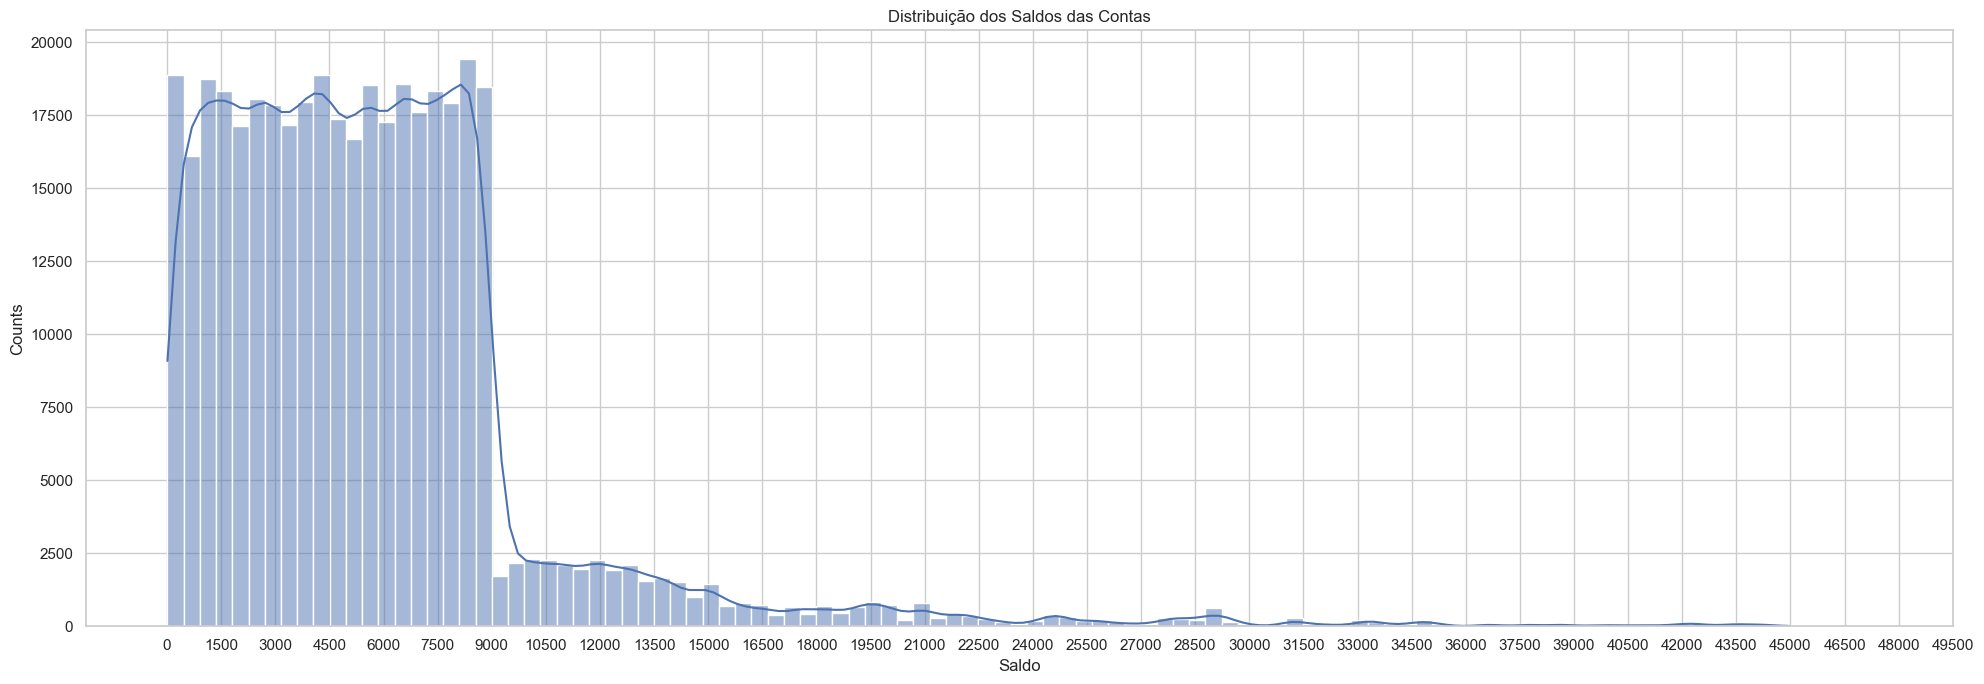

In [38]:
plt.figure(figsize=(20, 7))

ax = sns.histplot(data=df, x='account_balance', bins=100, kde=True, palette='Set2')

ax.set_xticks(np.arange(0, 50000, 1500))
ax.set_title('Distribuição dos Saldos das Contas')
ax.set_xlabel('Saldo')
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

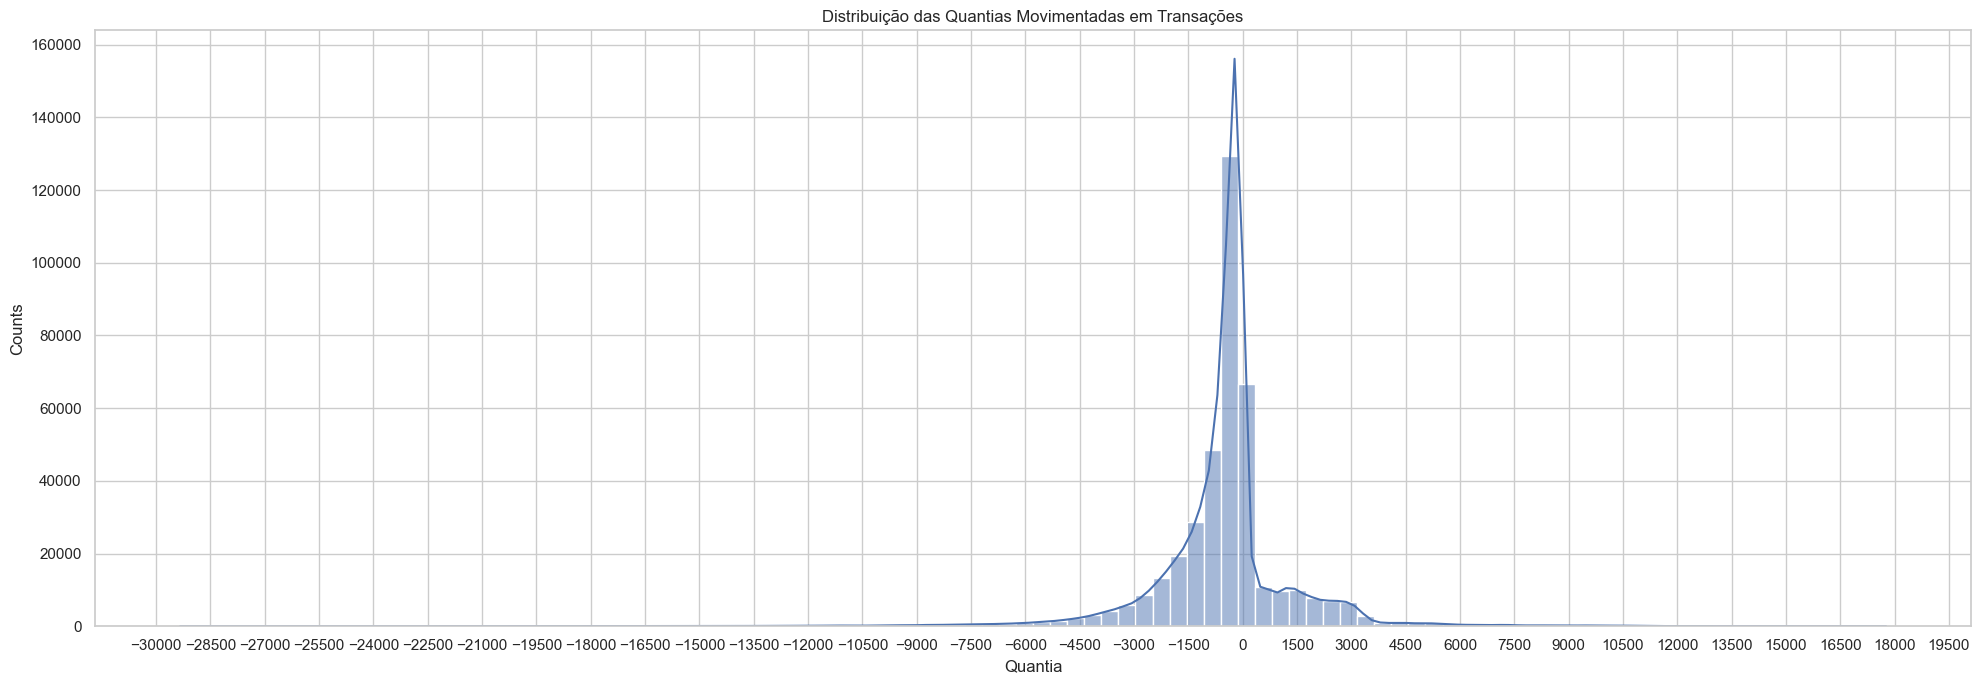

In [83]:
plt.figure(figsize=(20, 7))

ax = sns.histplot(data=df, x='transaction_amount', bins=100, kde=True, palette='Set2')

ax.set_xticks(np.arange(-30000, 20000, 1500))
ax.set_title('Distribuição das Quantias Movimentadas em Transações')
ax.set_xlabel('Quantia')
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Insights:
1. Como esperado, a maioria dos saldos estão concentrados em valores menores, indo de R$0.0 a R$10.000,0. Há outliers, com saldos podendo ultrapassar os R$40.000,0.
2. A grande maioria das quantias movimentadas representam valores negativos, saídas. Isso pode indicar um perfil geral dos clientes um pouco mais gastador.

### Análise de outliers
Checarei os outliers nas variáveis numéricas a fim de identificar se eles representam valores inconsistentes, como erros de medição. Além disso, irei plotar boxplots para fins de visualização.

In [40]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=df, features=numerical_features)

There are 91302 outliers in the dataset.

Number (percentage) of outliers per feature: 

account_balance: 15161 (3.79)%
transaction_amount: 76141 (19.03)%


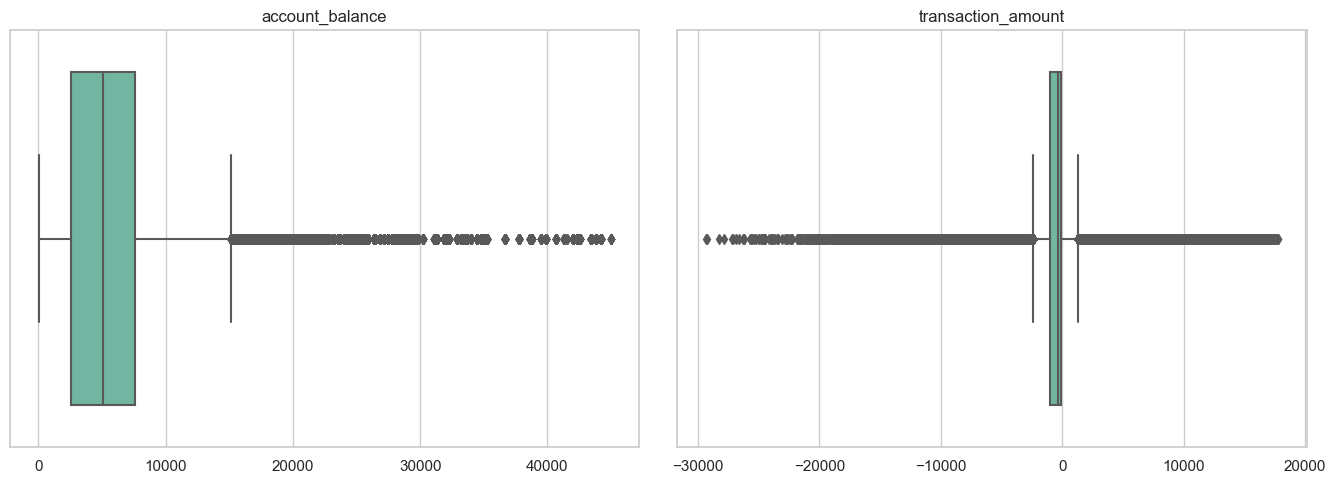

In [82]:
sns_plots(data=df, features=numerical_features, outliers=True)

Insights:
1. Como esperado, há muitos outliers em ambas as features. Entretando, infere-se que eles não representam erros de medição, uma vez que naturalmente alguns indivíduos possuem condições financeiras maiores e consequentemente saldos maiores em suas contas. Além disso, alguns clientes gastam mais, exibindo valores negativos muito altos. Por exemplo, -30000, pode representar impostos, investimentos ou gastos com saúde. Destarte, não irei remover outliers, dado que eles representam uma parcela significativa dos dados e carregam informações importantes para o modelo.

### Distribuições das variáveis categóricas
Irei olhar as distribuições das variáveis categóricas a fim de acessar quais são as características comuns dos clientes no que se refere aos seus gastos.

In [42]:
categorical_features

['account_type',
 'account_subtype',
 'account_name',
 'person_suitability',
 'transaction_category']

Para as contas.

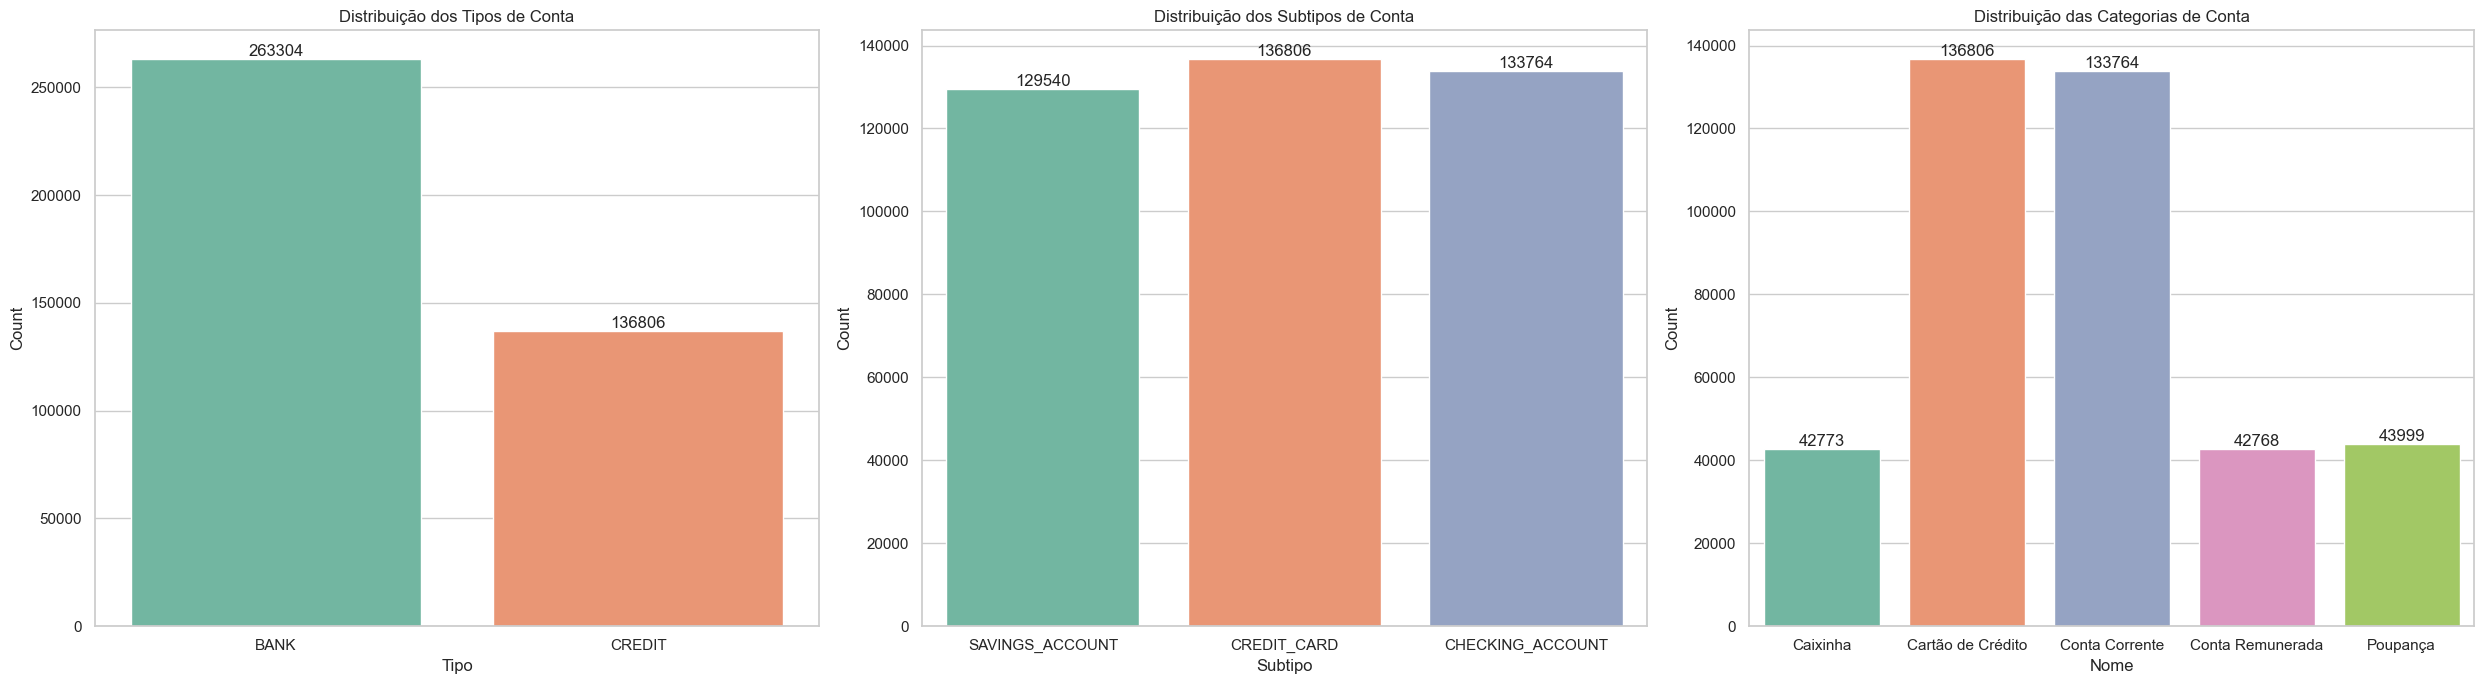

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))

ax0 = sns.countplot(data=df, x='account_type', ax=axes[0], palette='Set2')
ax0.set_title('Distribuição dos Tipos de Conta')
ax0.set_xlabel('Tipo')
ax0.set_ylabel('Count')
ax0.bar_label(ax0.containers[0])


ax1 = sns.countplot(data=df, x='account_subtype', ax=axes[1], palette='Set2')
ax1.set_title('Distribuição dos Subtipos de Conta')
ax1.set_xlabel('Subtipo')
ax1.set_ylabel('Count')
ax1.bar_label(ax1.containers[0])

ax2 = sns.countplot(data=df, x='account_name', ax=axes[2], palette='Set2')
ax2.set_title('Distribuição das Categorias de Conta')
ax2.set_xlabel('Nome')
ax2.set_ylabel('Count')
ax2.bar_label(ax2.containers[0])

plt.tight_layout()
plt.show()

Para as pessoas.

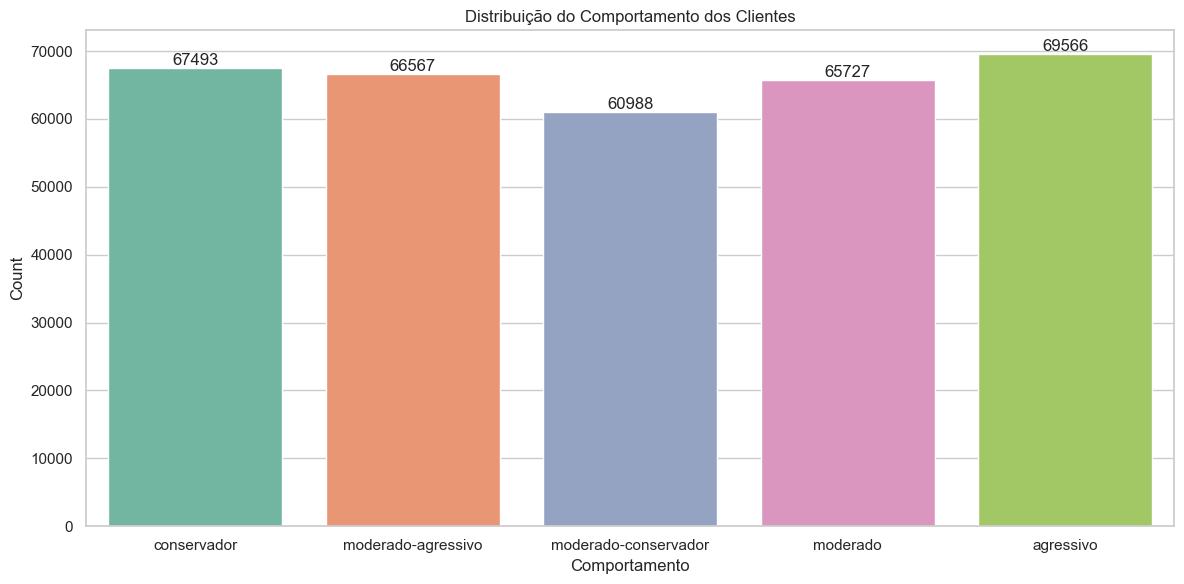

In [86]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(data=df, x='person_suitability', palette='Set2')
ax.bar_label(ax.containers[0])

ax.set_title('Distribuição do Comportamento dos Clientes')
ax.set_xlabel('Comportamento')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Para as transações.

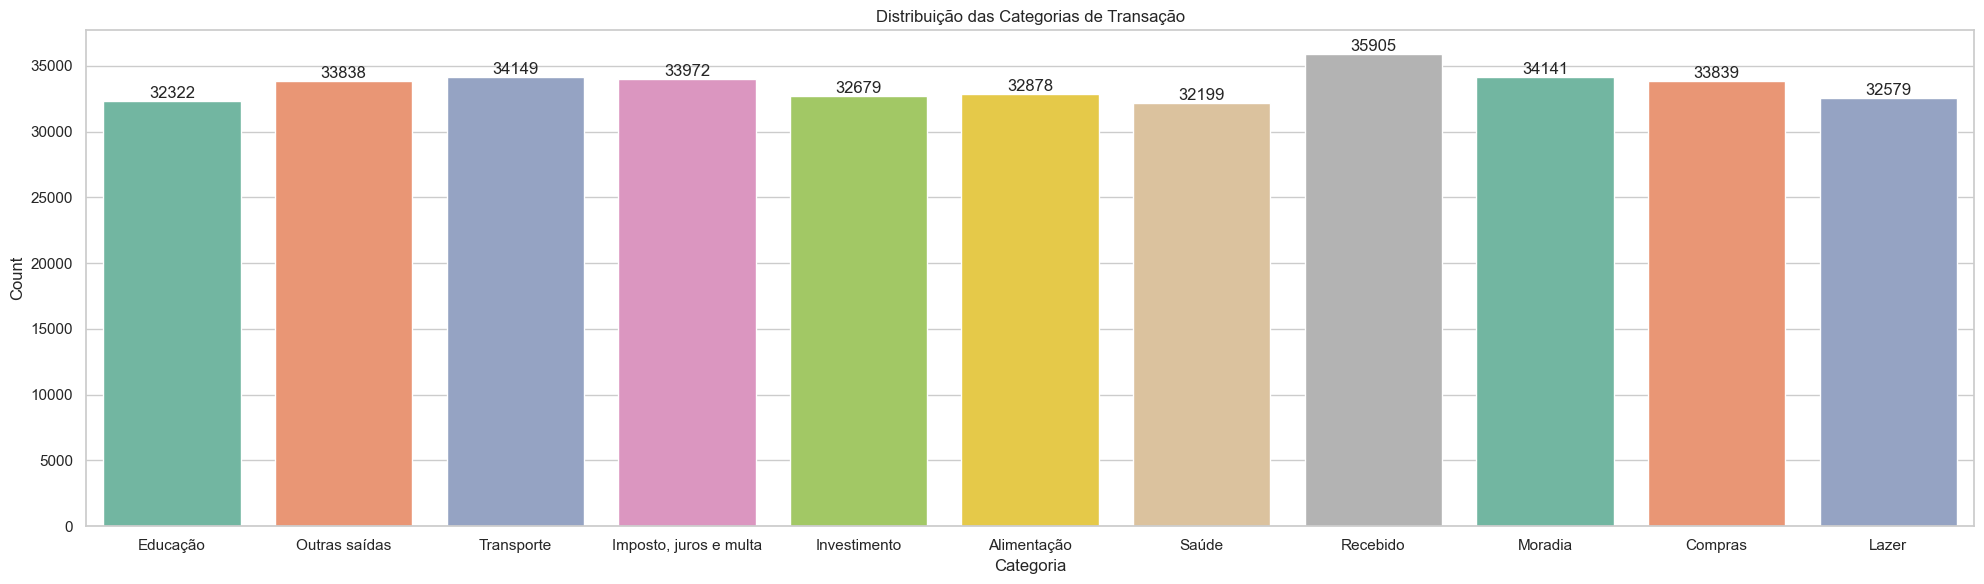

In [87]:
plt.figure(figsize=(20, 6))

ax = sns.countplot(data=df, x='transaction_category', palette='Set2')
ax.bar_label(ax.containers[0])

ax.set_title('Distribuição das Categorias de Transação')
ax.set_xlabel('Categoria')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Insights:
1. Contas bancárias representam quase o dobro em comparação com contas de crédito.
2. Os subtipos estão similarmente distribuídos entre conta poupança, cartão de crédito e conta corrente.
3. Dentre as categorias de conta, como esperado, cartão de crédito e conta corrente são as mais comuns.
4. Clientes agressivos são um pouco mais frequentes, entretanto, os clientes estão similarmente distribuídos entre os distintos comportamentos.
5. O recebimento é um pouco mais frequente, entretanto, as transações estão similarmente distribuídas entre as suas distintas categorias.

### Análise bivariada e multivariada
Realizarei a análise bivariada e multivariada das features a fim de observar como elas se relacionam.

### Matriz de correlação
Examinarei a matrix de correlação a fim de verificar se há relações lineares entre variáveis numéricas, acessando a força e direção dessas relações.

In [46]:
corr_matrix = df.corr(numeric_only=True)

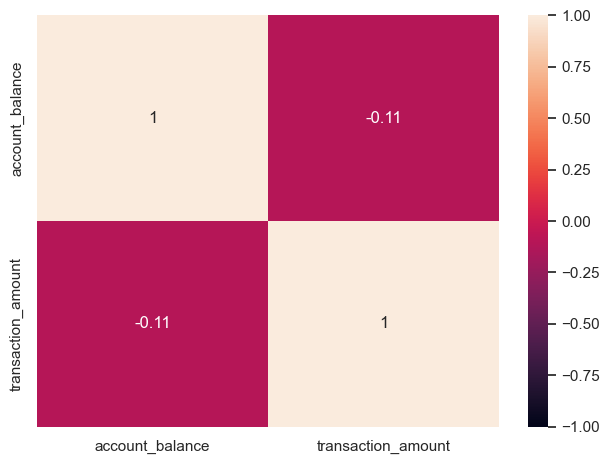

In [47]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

plt.tight_layout()
plt.show()

Insights:
1. Aparentemente, não há relacionamentos lineares significantes. Os saldos das contas e a quantia dispendida nas transações estão fracamente negativamente correlacionadas. 

### Pairplot
Olharei os dados numéricos no pairplot abaixo, a fim de verificar se há relacionamentos não lineares que passaram despercebidos pela correlação de pearson.

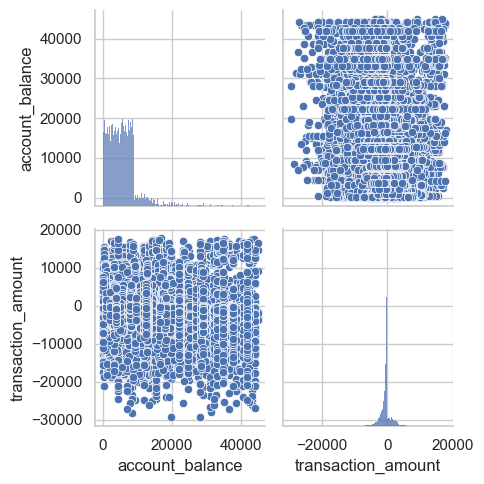

In [88]:
sns.pairplot(data=df, palette='Set2')

plt.tight_layout()
plt.show()

Insights:
1. Como esperado, não há nenhum relacionamento ou tendência entre as variáveis numéricas.

A partir deste ponto, a fim de guiar a análise, irei tentar responder algumas perguntas, as quais serão listadas abaixo.

### Account Balance vs Account type/subtype/name
Qual é o saldo médio das diferentes categorias de conta?

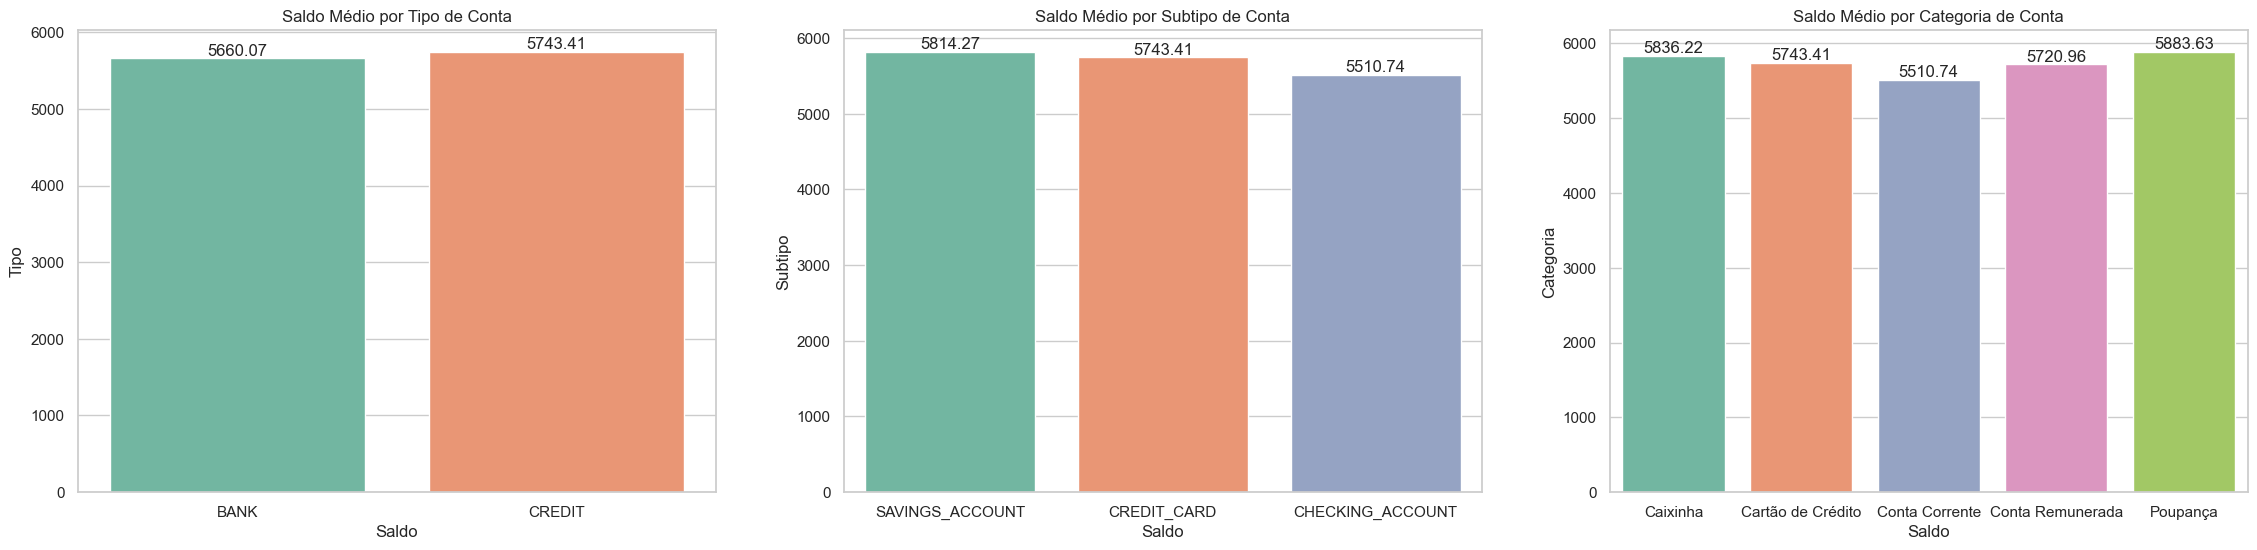

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(28, 6))

ax0 = sns.barplot(data=df, x='account_type', y='account_balance', ax=axes[0], ci=None, palette='Set2')
ax0.set_title('Saldo Médio por Tipo de Conta')
ax0.set_xlabel('Saldo')
ax0.set_ylabel('Tipo')
for container in ax0.containers:
    ax0.bar_label(container)

ax1 = sns.barplot(data=df, x='account_subtype', y='account_balance', ax=axes[1], ci=None, palette='Set2')
ax1.set_title('Saldo Médio por Subtipo de Conta')
ax1.set_xlabel('Saldo')
ax1.set_ylabel('Subtipo')
for container in ax1.containers:
    ax1.bar_label(container)

ax2 = sns.barplot(data=df, x='account_name', y='account_balance', ax=axes[2], ci=None, palette='Set2')
ax2.set_title('Saldo Médio por Categoria de Conta')
ax2.set_xlabel('Saldo')
ax2.set_ylabel('Categoria')
for container in ax2.containers:
    ax2.bar_label(container)

Insights:
1. Não há diferenças expressivas nos saldos dos diferentes tipos, subtipos e categorias de conta. Contas de crédito tem um saldo ligeiramente maior do que bancárias, por exemplo.

### Person Suitability vs Account type/subtype/name
Como o perfil do cliente (person_suitability) está distribuído entre os diferentes tipos de conta (account_type) e subtipos de conta (account_subtype)?

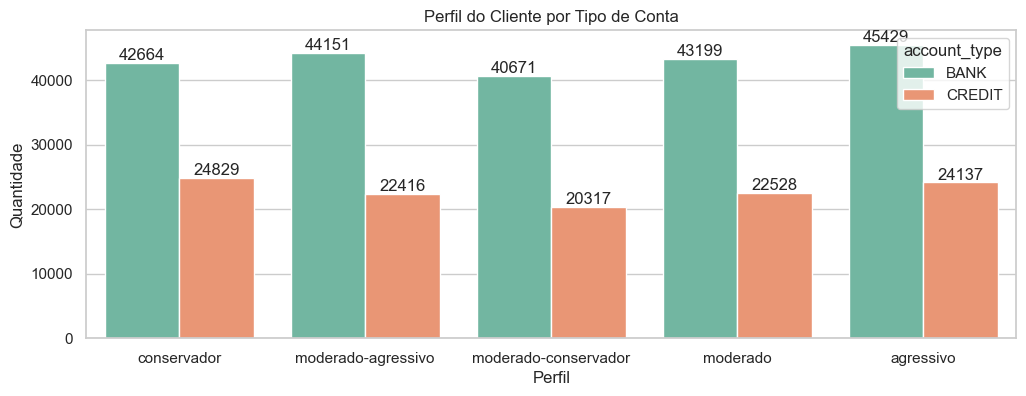

In [116]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(data=df, x='person_suitability', hue='account_type', palette='Set2')
ax.set_title('Perfil do Cliente por Tipo de Conta')
ax.set_xlabel('Perfil')
ax.set_ylabel('Quantidade')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

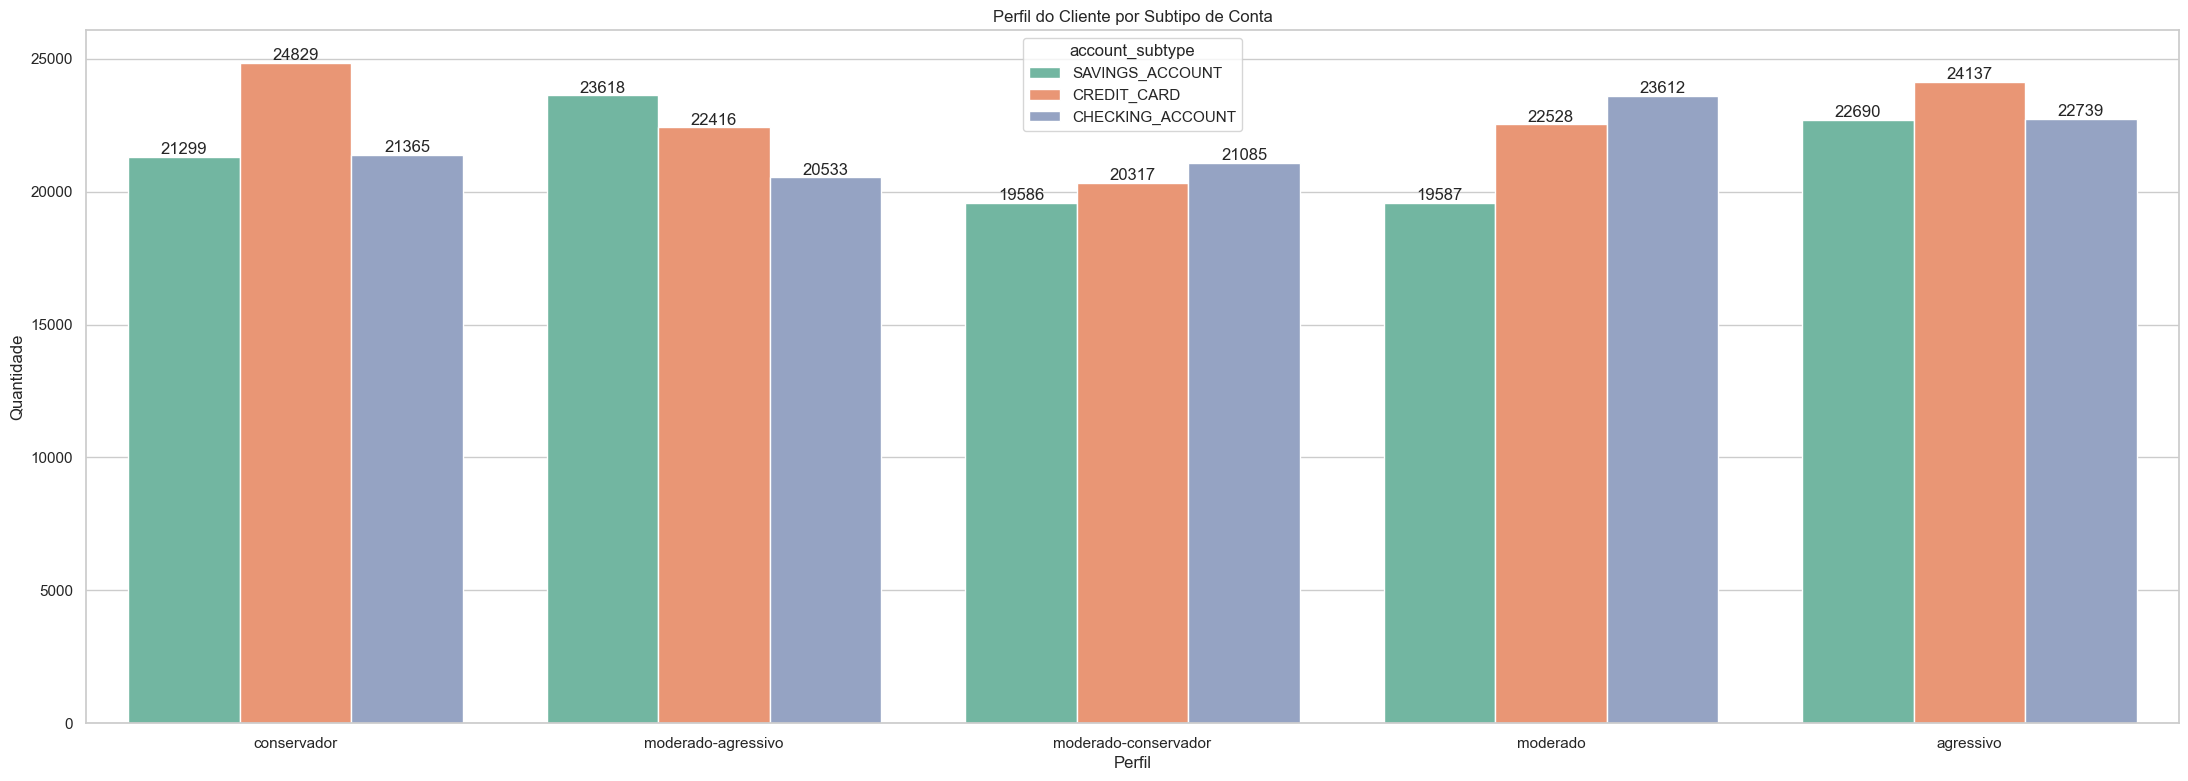

In [115]:
plt.figure(figsize=(27, 9))
ax = sns.countplot(data=df, x='person_suitability', hue='account_subtype', palette='Set2')
ax.set_title('Perfil do Cliente por Subtipo de Conta')
ax.set_xlabel('Perfil')
ax.set_ylabel('Quantidade')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

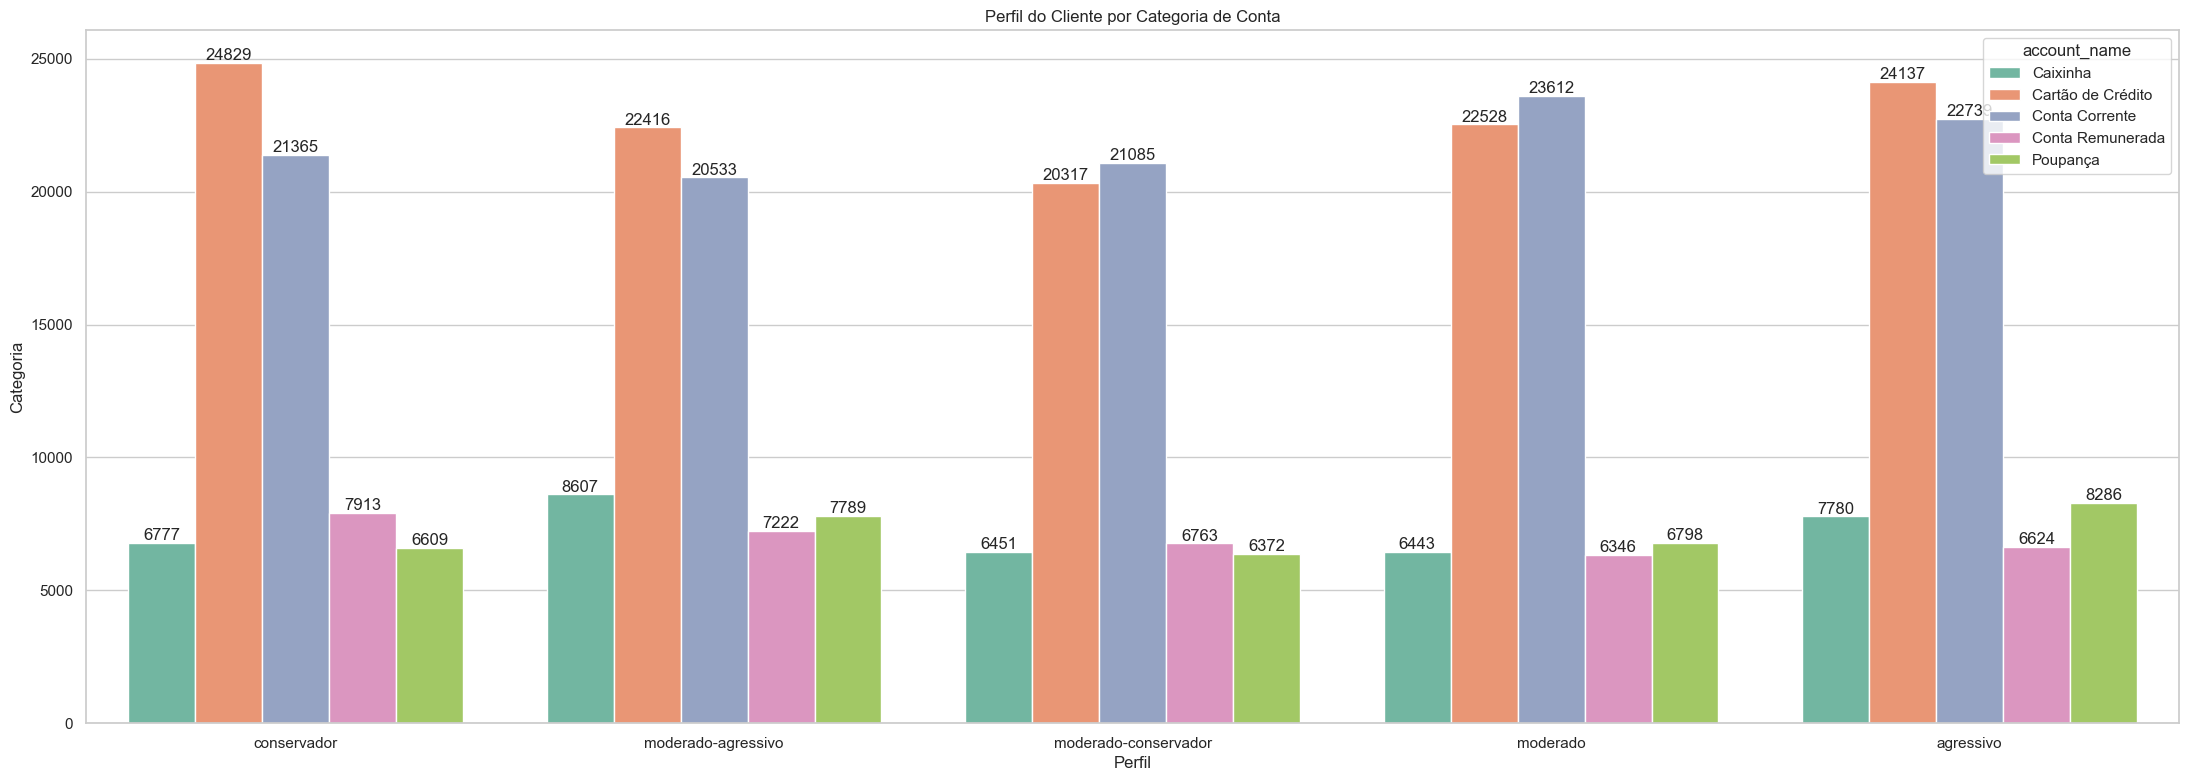

In [114]:
plt.figure(figsize=(27, 9))
ax = sns.countplot(data=df, x='person_suitability', hue='account_name', palette='Set2')
ax.set_title('Perfil do Cliente por Categoria de Conta')
ax.set_xlabel('Perfil')
ax.set_ylabel('Categoria')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Insights:
1. No geral, os perfis seguem a distribuição geral dos tipos de conta, com o número de contas bancárias representando quase 2x o número de contas de crédito. O mesmo vale para as categorias de conta, prevalecendo cartão de crédito e conta corrente, em detrimento das outras.
2. Clientes conservadores apresentam uma leve tendência a usar mais contas de crédito.

### Account Balance vs Person Suitability
Existe alguma relação entre o saldo da conta e o perfil do cliente?

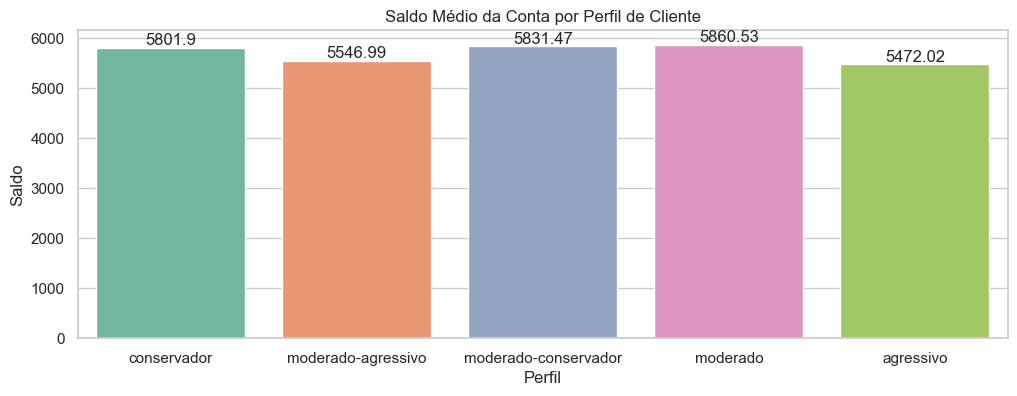

In [121]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(data=df, x='person_suitability', y='account_balance', ci=None, palette='Set2')
ax.set_title('Saldo Médio da Conta por Perfil de Cliente')
ax.set_xlabel('Perfil')
ax.set_ylabel('Saldo')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

Insights:
1. Clientes moderados apresentam o maior saldo médio da conta, enquanto clientes moderado-agressivos apresentam o menor saldo médio. Entretanto, essas diferenças são pouco significativas.

### Transaction Amount vs Person Suitability
Existe algum perfil de cliente que tende a movimentar mais ou menos dinheiro em suas transações, na média?

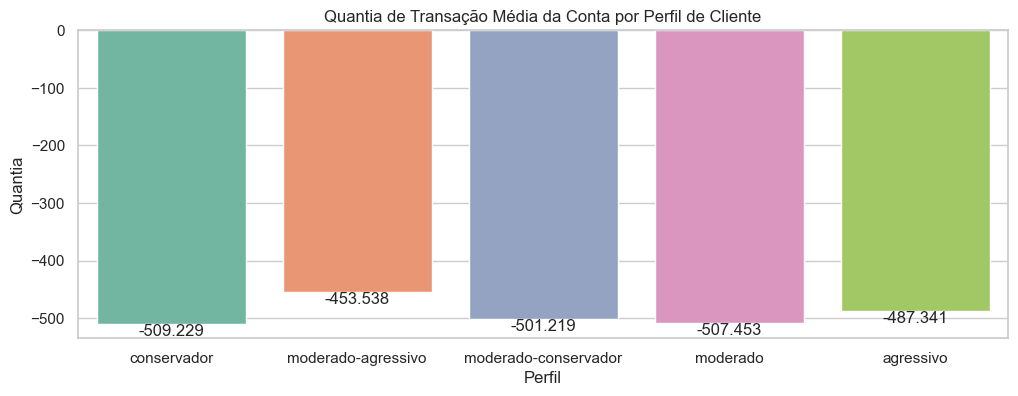

In [123]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(data=df, x='person_suitability', y='transaction_amount', ci=None, palette='Set2')
ax.set_title('Quantia de Transação Média da Conta por Perfil de Cliente')
ax.set_xlabel('Perfil')
ax.set_ylabel('Quantia')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

Insights:
1. Da mesma forma, não há diferenças expressivas. Clientes moderado-agressivo tendem a gastar um pouco menos.

1. Qual é o saldo médio das diferentes categorias de conta (account_type e account_subtype)?
2. Como o perfil do cliente (person_suitability) está distribuído entre os diferentes tipos de conta (account_type) e subtipos de conta (account_subtype)?
3. Existe uma correlação entre o saldo da conta (account_balance) e o perfil do cliente (person_suitability)?
4. Quais são as principais categorias de transações (transaction_category) e quanto dinheiro é gasto em cada uma delas?
5. Como as categorias de transações variam de acordo com o tipo de conta (account_type) ou subtipo de conta (account_subtype)?
6. Qual é a tendência ao longo do tempo nas transações (transaction_amount) e como ela varia entre as diferentes categorias de transações?
7. Existem diferenças significativas nos gastos (transaction_amount) entre os diferentes tipos de conta (account_type) ou subtipos de conta (account_subtype)?
8. Como as datas das transações (transaction_date) estão distribuídas ao longo do tempo? Há sazonalidade nas transações?
9. Qual é a relação entre o perfil do cliente (person_suitability) e as categorias de transações mais frequentes?

In [124]:
df.columns

Index(['account_type', 'account_subtype', 'account_balance', 'account_name',
       'person_suitability', 'transaction_amount', 'transaction_date',
       'transaction_category'],
      dtype='object')

### Transaction Amount vs Transaction Category
Quais são as principais categorias de transações (transaction_category) e quanto dinheiro é gasto em cada uma delas?

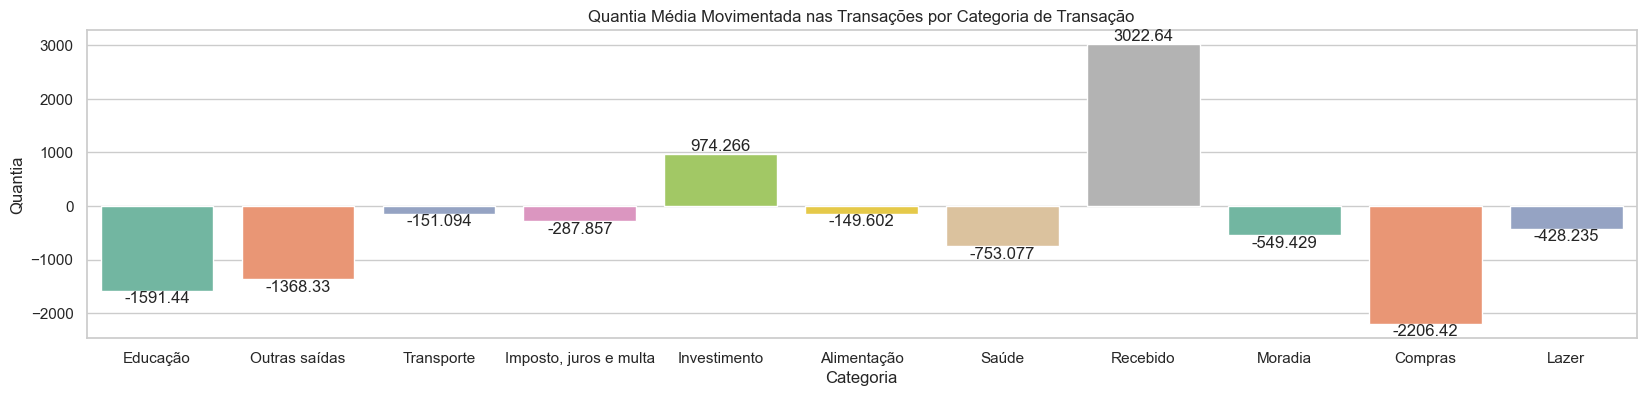

In [128]:
plt.figure(figsize=(20, 4))
ax = sns.barplot(data=df, x='transaction_category', y='transaction_amount', ci=None, palette='Set2')
ax.set_title('Quantia Média Movimentada nas Transações por Categoria de Transação')
ax.set_xlabel('Categoria')
ax.set_ylabel('Quantia')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

Insights:
1. Os maiores gastos dos clientes, em média, estão na categoria de compras, outras saídas e educação. Isso indica um perfil gastador, uma vez que o total movimentado para compras é significativamente maior.
2. Em média, os clientes receberam 3022 reais em suas contas.
3. Em média, os clientes investiram 974,2 reais.

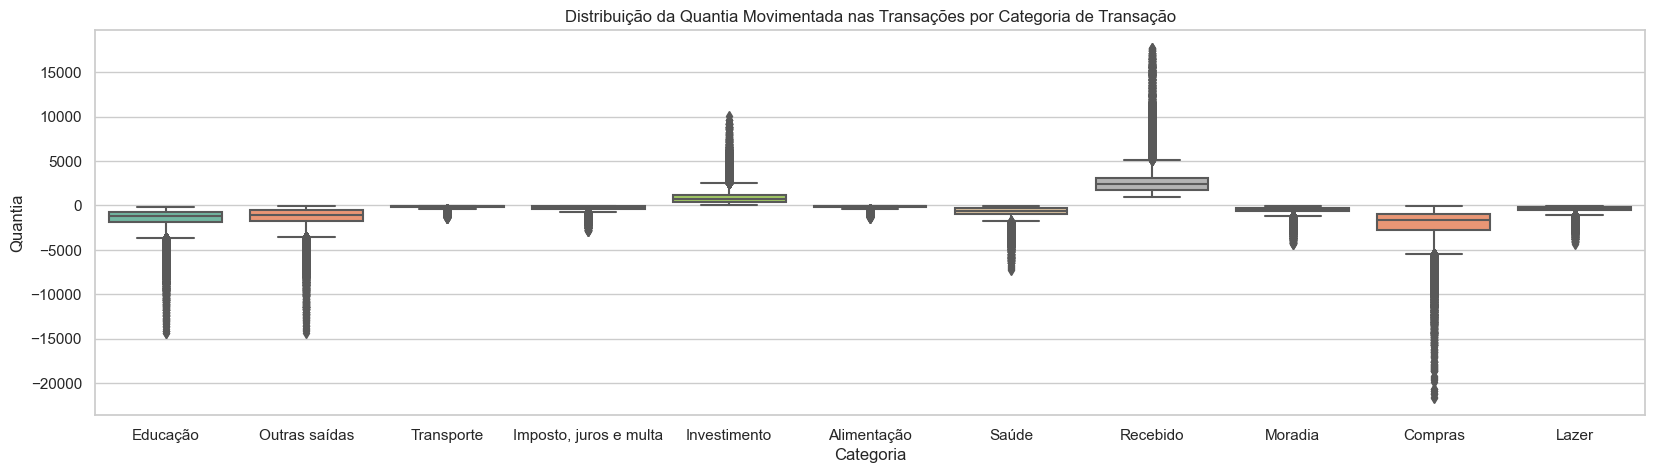

In [133]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data=df, x='transaction_category', y='transaction_amount', palette='Set2')
ax.set_title('Distribuição da Quantia Movimentada nas Transações por Categoria de Transação')
ax.set_xlabel('Categoria')
ax.set_ylabel('Quantia')
plt.show()

Apesar de os outliers terem superestimado os valores médios, os padrões tendem a se manter para todos os clientes. Os gastos em compras superam outros gastos, enquanto eles investem uma parcela interessante do dinheiro, quando comparado ao total recebido.

### Transaction Category vs Account type/subtype/name
Como as categorias de transações variam de acordo com o tipo de conta (account_type), subtipo de conta (account_subtype) ou categoria de conta (account_name)?

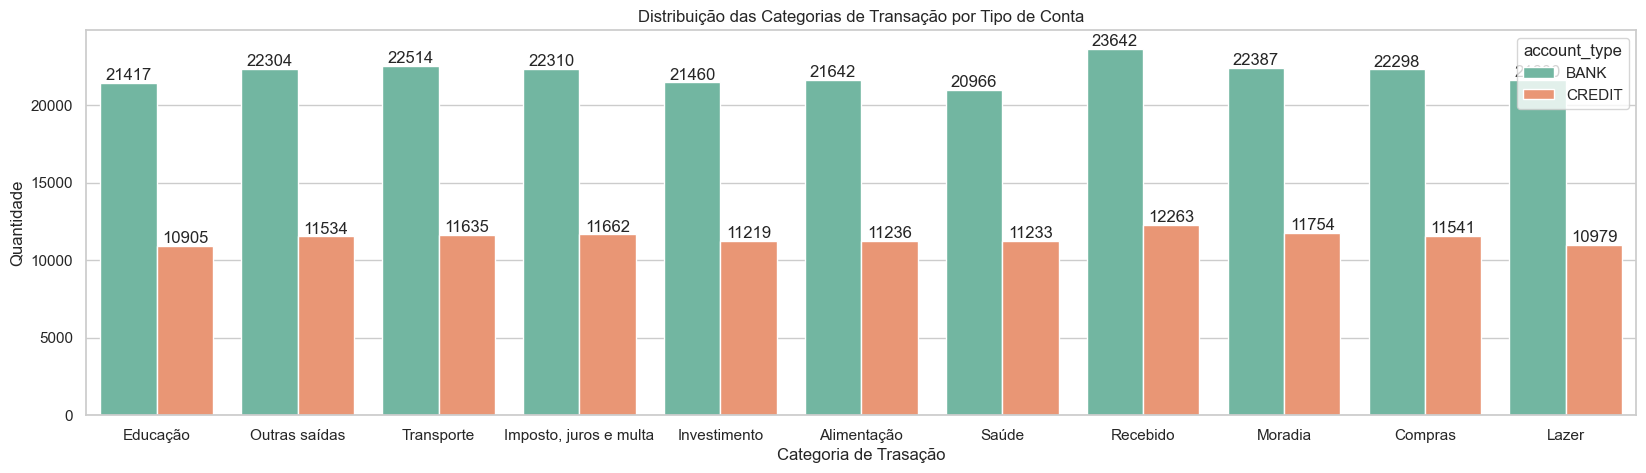

In [139]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(data=df, x='transaction_category', hue='account_type', palette='Set2')
ax.set_title('Distribuição das Categorias de Transação por Tipo de Conta')
ax.set_xlabel('Categoria de Trasação')
ax.set_ylabel('Quantidade')

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

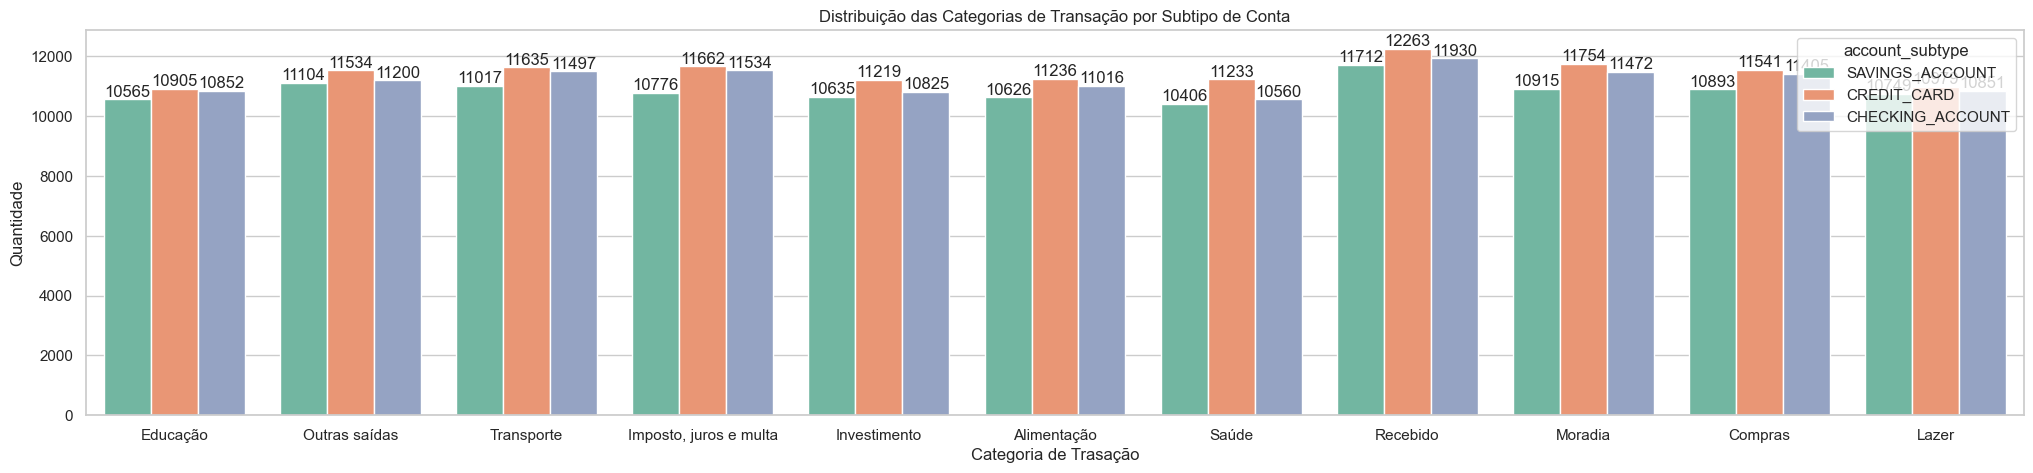

In [141]:
plt.figure(figsize=(25, 5))
ax = sns.countplot(data=df, x='transaction_category', hue='account_subtype', palette='Set2')
ax.set_title('Distribuição das Categorias de Transação por Subtipo de Conta')
ax.set_xlabel('Categoria de Trasação')
ax.set_ylabel('Quantidade')

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

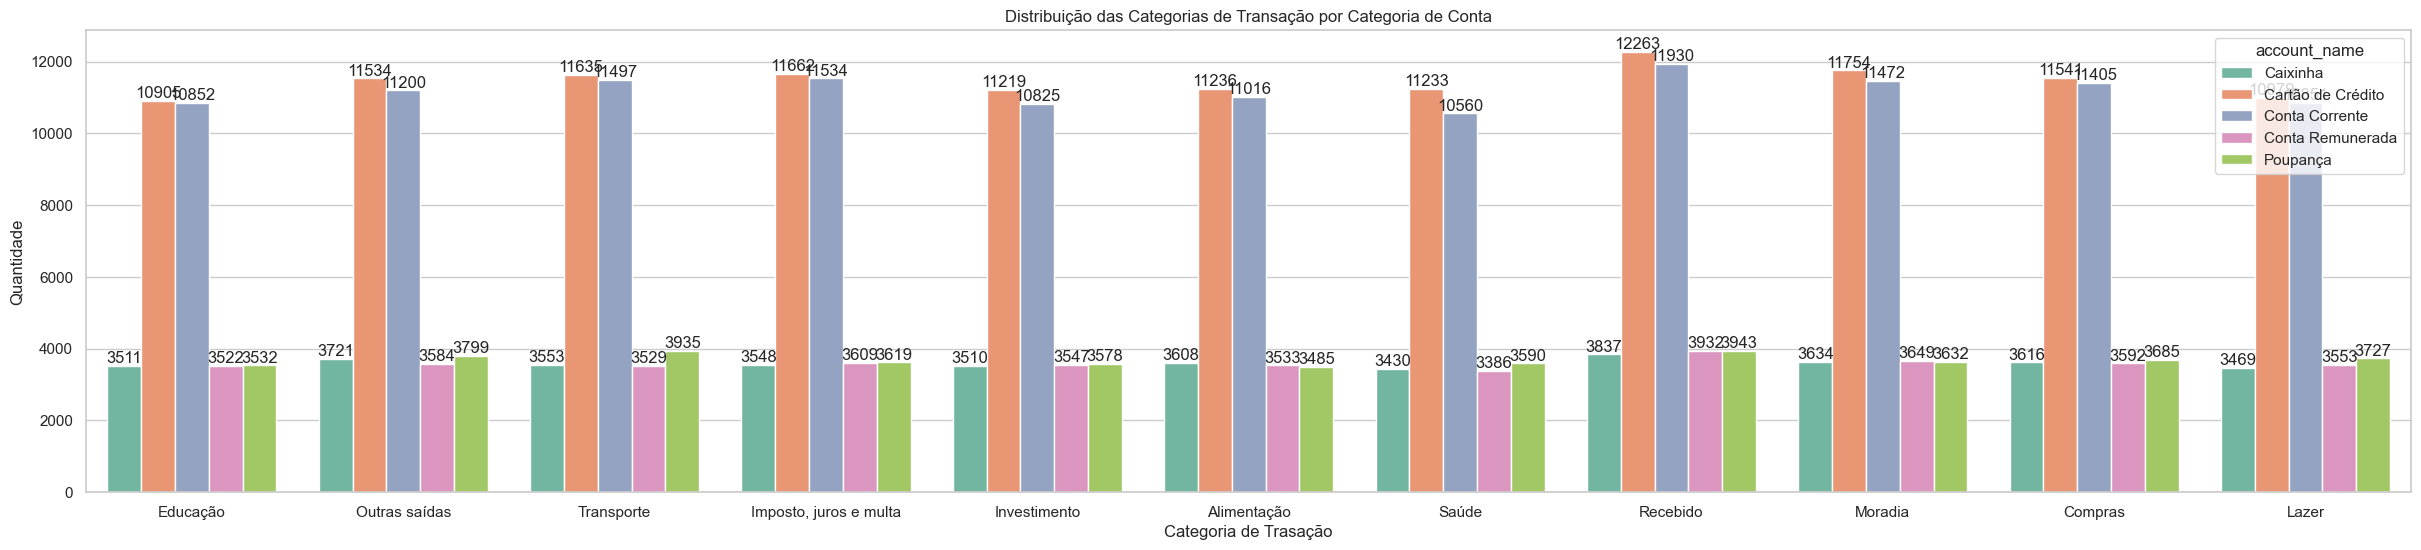

In [144]:
plt.figure(figsize=(30, 6))
ax = sns.countplot(data=df, x='transaction_category', hue='account_name', palette='Set2')
ax.set_title('Distribuição das Categorias de Transação por Categoria de Conta')
ax.set_xlabel('Categoria de Trasação')
ax.set_ylabel('Quantidade')

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

Insights:
1. Não há padrões significativos. As mesmas distribuições univariadas se apresentam aqui.

### Transaction Amount vs Account Type/Subtype/Name
Existem diferenças significativas nos gastos (transaction_amount) entre os diferentes tipos de conta (account_type), subtipos de conta (account_subtype) ou categoria de conta (account_name)?

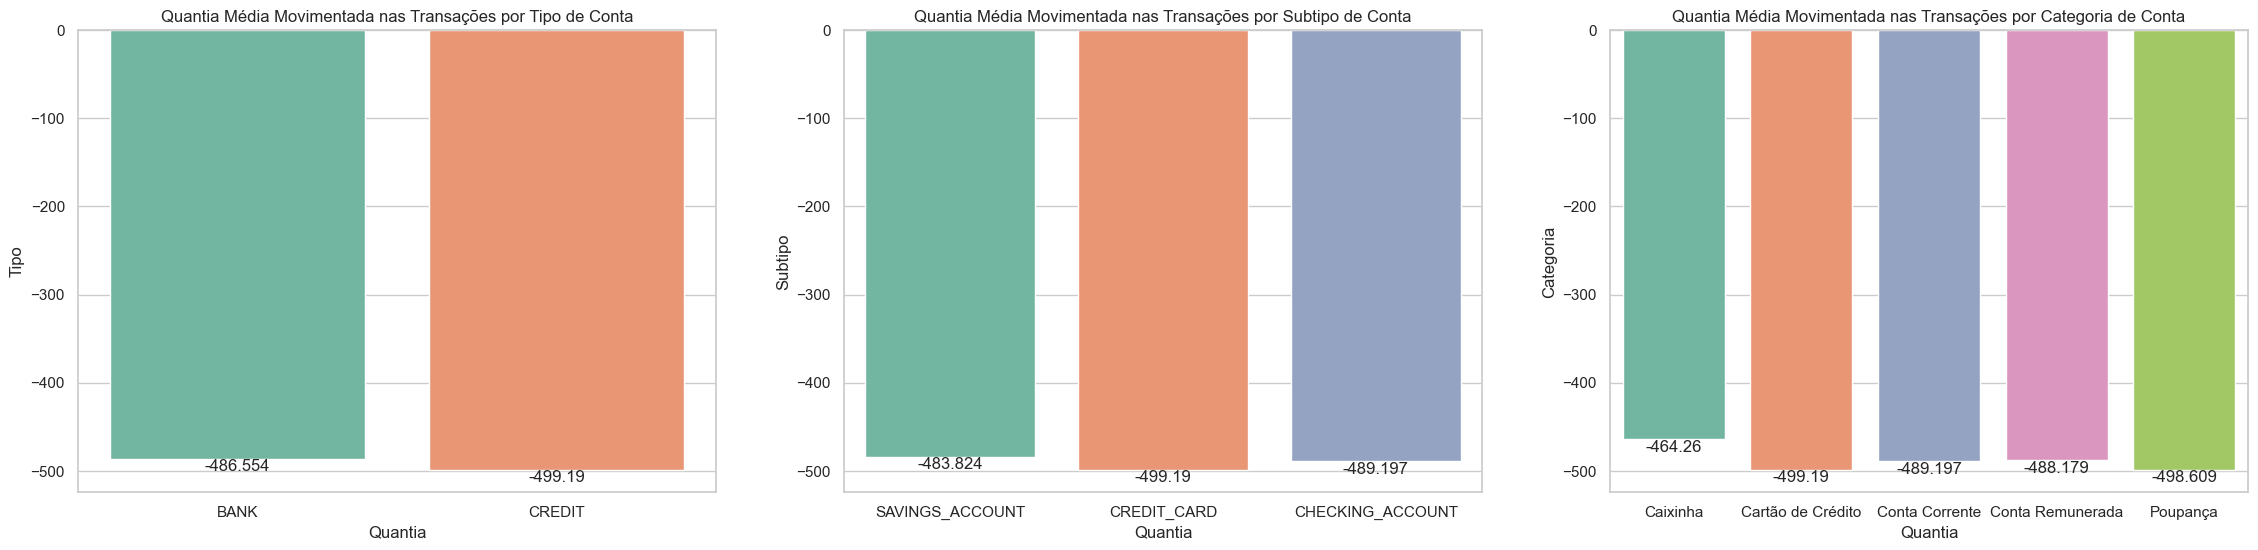

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(28, 6))

ax0 = sns.barplot(data=df, x='account_type', y='transaction_amount', ax=axes[0], ci=None, palette='Set2')
ax0.set_title('Quantia Média Movimentada nas Transações por Tipo de Conta')
ax0.set_xlabel('Quantia')
ax0.set_ylabel('Tipo')
for container in ax0.containers:
    ax0.bar_label(container)

ax1 = sns.barplot(data=df, x='account_subtype', y='transaction_amount', ax=axes[1], ci=None, palette='Set2')
ax1.set_title('Quantia Média Movimentada nas Transações por Subtipo de Conta')
ax1.set_xlabel('Quantia')
ax1.set_ylabel('Subtipo')
for container in ax1.containers:
    ax1.bar_label(container)

ax2 = sns.barplot(data=df, x='account_name', y='transaction_amount', ax=axes[2], ci=None, palette='Set2')
ax2.set_title('Quantia Média Movimentada nas Transações por Categoria de Conta')
ax2.set_xlabel('Quantia')
ax2.set_ylabel('Categoria')
for container in ax2.containers:
    ax2.bar_label(container)

Insights:
1. Os mesmos padrões da análise univariada se mantêm, não havendo diferenças significativas das quantias médias movimentadas em transações entre os diferentes tipos/subtipos/categorias de conta.